# Basic Usage

Welcome to the pulsarfitpy documentation. The library has potential to assist with many forms of data analysis regarding pulsars, made to work in conjunction with the [Australian National Telescope Facility Pulsar Catalogue](https://www.atnf.csiro.au/research/pulsar/psrcat/) and their Python wrapper, [psrqpy](https://github.com/mattpitkin/psrqpy). This documentation serves as a brief introduction to the library and how to use one of its core features: accurate polynomial regression with scikit-learn and a psrqpy query.

## Polynomial Approximation Model

To use the polynomial approximation feature, import the instance of pulsarfitpy into our file.

In [93]:
from pulsarfitpy import PulsarApproximation

# Understanding the PulsarApproximation class

>[NOTE]
> Some of the library inputs involve specific parameter queries to be accessed by psrqpy. Refer to the [psrqpy documentation](https://psrqpy.readthedocs.io/_/downloads/en/latest/pdf/) and the [legend of ATNF parameters](https://www.atnf.csiro.au/research/pulsar/psrcat/psrcat_help.html?type=expert#par_list) if needed.

The PulsarApproximation class enables six arguments to be inputted:

- ```query=``` [QueryATNF]: A query generated using the psrqpy Python library.
- ```x_param=```[str]: The x-axis parameter(s) being graphed through matplotlib. 
- ```y_param=```[str]: The y-axis parameter(s) being graphed through matplotlib. 
- ```test_degree=```[int]: The amount of degrees being tested for regression, starting from 1 and ending at the test_degree value.
- ```log_x=```[bool]: Determines if each element in the x_val array should take the logarithm base 10. Useful for analyzing high data values
- ```log_y=```[bool]: Determines if each element in the y_val array should take the logarithm base 10. Useful for analyzing high data values

The class also consists of six main functions:
- ```.fit_polynomial()```: Takes the query data and does the polynomial regression with scikit-learn. Displays R² scores in terminal in correspondence with each degree tested.
- ```.get_polynomial_expression()```: Fetches the polynomial expression generated by the ```.fit_polynomial()``` function.
- ```.print_polynomial()```: Prints the polynomial function into the terminal.
- ```.plot_r2_scores()```: Visualizes the R² vs. degree graph using matplotlib. Can be done manually as well.
- ```.plot_approximation_curve()```: Visualizes the approximated polynomial curve with the psrqpy pulsar data.
- ```.plot_combined_analysis()```: Visualizes both the polynomial regression curve and the R² vs. degree graph in the same figure.

For manual plotting for the approximated function, simply input the following arguments into ```plt.plot()```:
- ```approximator.predicted_x```
- ```approximator.predicted_y```

Refer to the end of this notebook for a manual plotting example.

First, create a psrqpy query with chosen plotted parameters using the ```QueryATNF``` class. For this example, we will plot a BSURF vs. AGE graph based on psrqpy data. It's worth noting that a psrqpy query is important for accessing many features of pulsarfitpy, so creating one will almost always be necessary.

In [94]:
from psrqpy import QueryATNF

query = QueryATNF(params=["AGE", "BSURF"])

Create the PulsarApproximation instance using the imported module, and input the query, x & y parameters, and test degrees.

In [95]:
approximator = PulsarApproximation(query=query, 
                                   x_param='AGE', 
                                   y_param='BSURF', 
                                   test_degree=6,  # Tested Degrees are from 1-6
                                   log_x=True,     # Recommended for high AGE values
                                   log_y=True)     # Recommended for high BSURF values

Calling the ```.fit_polynomial()``` function will cause the program to conduct an R² analysis with each tested degree from 1 to the chosen ```test_degree```.

In [96]:
approximator.fit_polynomial()


Fitting Polynomial Approximation...
Degree 1 → R² Score: 0.737101
Degree 2 → R² Score: 0.839492
Degree 3 → R² Score: 0.844995
Degree 4 → R² Score: 0.862429
Degree 5 → R² Score: 0.863665
Degree 6 → R² Score: 0.864953


To display the approximated polynomial function, simply run the ```.print_polynomial()``` function in your code.

In [97]:
approximator.print_polynomial()


Best Polynomial Degree: 6
Approximated Polynomial Function:
f(x) = -12.6546407640 + 32.5556447358 * x**1 + -14.7886244865 * x**2 + 3.2201179769 * x**3 + -0.3628045510 * x**4 + 0.0202173424 * x**5 + -0.0004395284 * x**6


The resulting f(x) can reveal many aspects regarding a wide variety of pulsars; in this case, we analyze the surface magnetic field, or "BSURF" with respect to characteristic age, or "AGE".

# Visualizing the polynomial

To further assist in data analysis using scikit-learn, we enable the ability to use specialized plotting functions to enable detailed visualizations of the polynomial in comparison to real ATNF data. To plot the function alongside ATNF data, run the following:

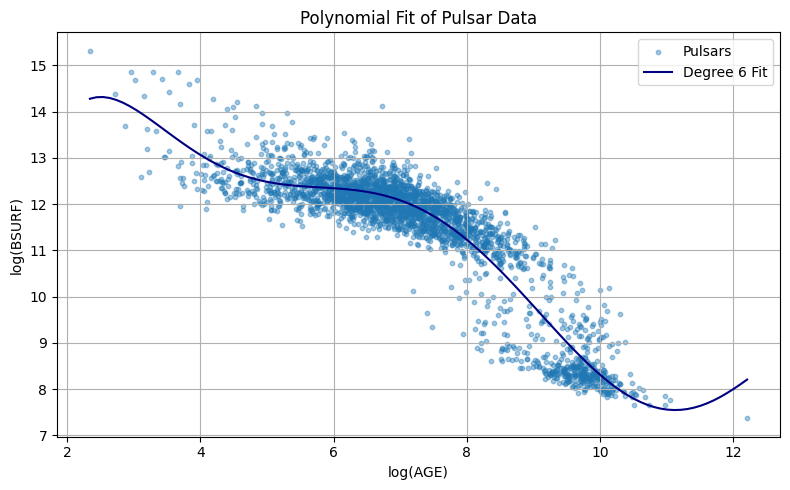

In [98]:
approximator.plot_approximation_curve()

The resulting f(x) can reveal many aspects regarding a wide variety of pulsars; in this case, we analyze the surface magnetic field, or "BSURF" with respect to characteristic age, or "AGE", of each detected pulsar. We note that the approximation may lay grounds to many conjectures in observational and theoretical physics based on the average behavior of these pulsars.

We also include error analysis of the approximated function, visualized on an R² vs. degree graph by using the ```.plot_r2_scores()``` function. The graph shows how the R² parameter changes with respect to each degree tested within 1 and the chosen ```test_degree```.

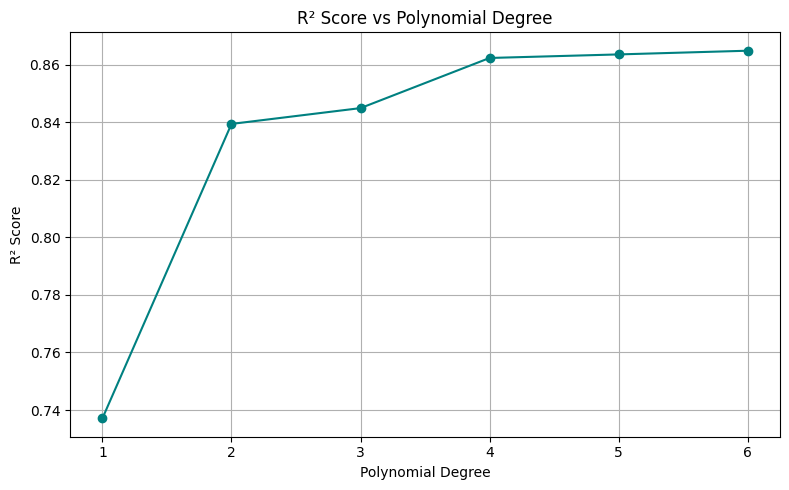

In [99]:
approximator.plot_r2_scores()

Finally, we allow for a combined visualization of both graphs, all compiled into one matplotlib figure through the ```.plot_combined_analysis()``` function.

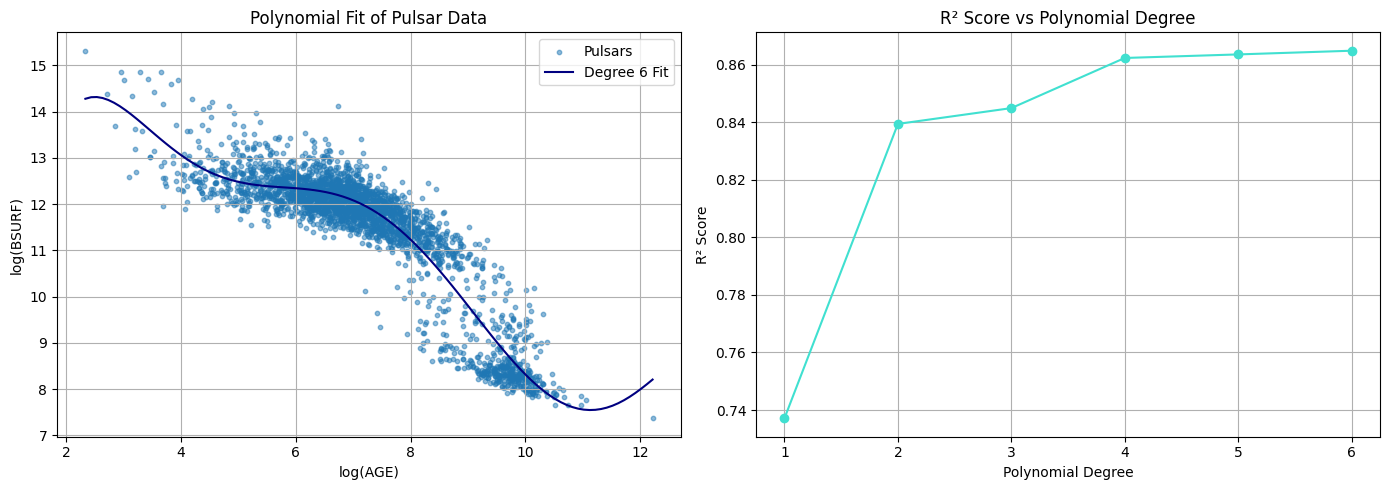

In [100]:
approximator.plot_combined_analysis()

These basic functions allow for a ground level, lightweight analysis of the observed ATNF data through the PulsarApproximation module.

## Manual plotting using PulsarApproximation

We understand that plotting functions alone may not allow for user-desired graphs. Therefore, we allow a way for the user to create their own matplotlib figure and yield the results desired in their own graph. We make an example of this by using more specified axis names and a red colored curve to plot a more customized graph.

First, create the matplotlib figure and its desired configurations.

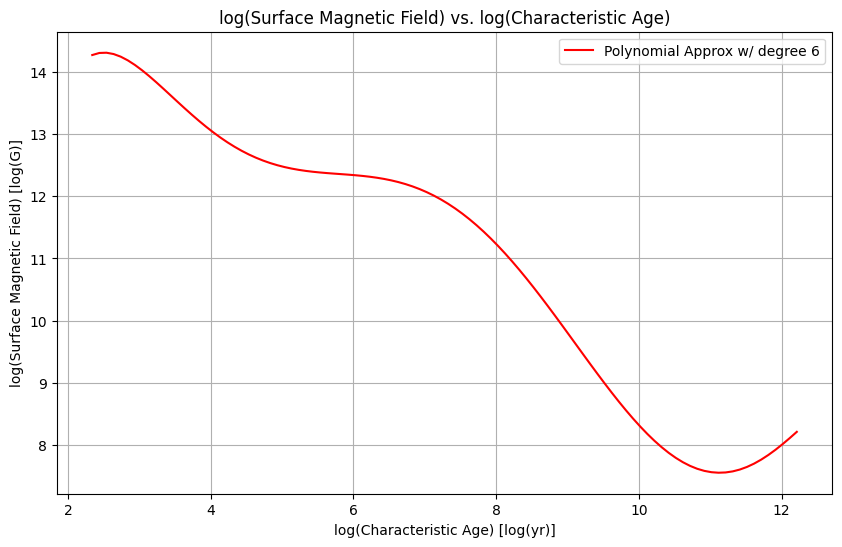

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("log(Surface Magnetic Field) vs. log(Characteristic Age)")
plt.xlabel('log(Characteristic Age) [log(yr)]')
plt.ylabel('log(Surface Magnetic Field) [log(G)]')

# Plot the polynomial regression model
plt.plot(approximator.predicted_x, 
         approximator.predicted_y, 
         color='red',
         label=f'Polynomial Approx w/ degree {approximator.best_degree}') # approximator.best_degree shows the chosen degree for the graph
plt.grid(True)
plt.legend()
plt.show()

To plot the approximated model, use the aforementioned ```approximator.predicted_x``` and```approximator.predicted_y``` variables and the ```plt.plot()``` function:

Finally, to compare the model with real ATNF data, simply use the ```.x_data``` and ```.y_data``` variables and the ```plt.scatter()``` function to do so.

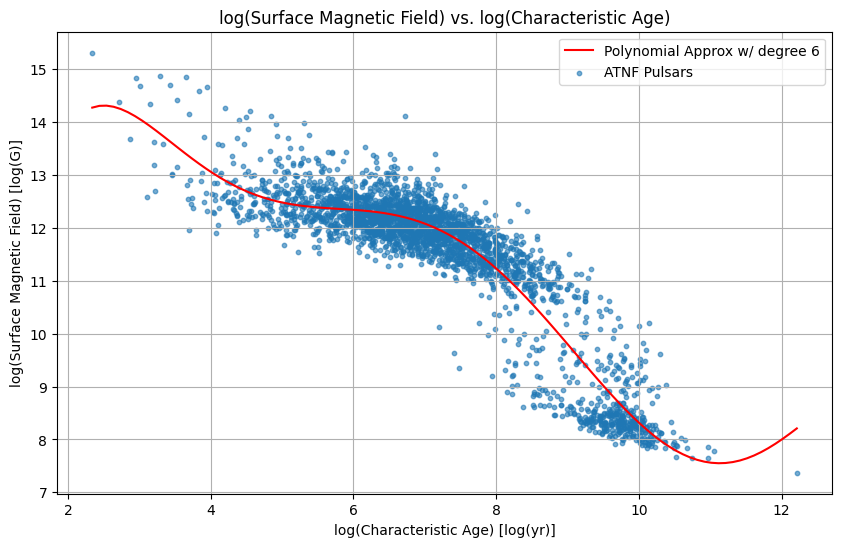

In [102]:
plt.figure(figsize=(10, 6))
plt.title("log(Surface Magnetic Field) vs. log(Characteristic Age)")
plt.xlabel('log(Characteristic Age) [log(yr)]')
plt.ylabel('log(Surface Magnetic Field) [log(G)]')

plt.plot(approximator.predicted_x, 
         approximator.predicted_y, 
         color='red',
         label=f'Polynomial Approx w/ degree {approximator.best_degree}') # approximator.best_degree shows the chosen degree for the graph

# Plot the pulsar data
plt.scatter(approximator.x_data, approximator.y_data, s=10, alpha=0.6, label='ATNF Pulsars')

plt.grid(True)
plt.legend()
plt.show()

This sums up the complete basic usage of our library.